## Imports

In [ ]:
!pip uninstall scikit-learn -y
!pip install -U scikit-learn

Found existing installation: scikit-learn 1.0.1
Uninstalling scikit-learn-1.0.1:
  Successfully uninstalled scikit-learn-1.0.1
     |████████████████████████████████| 23.2 MB 1.7 MB/s 


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
%matplotlib inline

np.random.seed(314159)

## Setup & Download

In [ ]:
!pip install kaggle --upgrade
print ("writing kaggle")
!echo "{\"username\":\"USERNAME\",\"key\":\"KEYYYYYYYYYYYYYYY\"}" > kaggle.json
!sudo mkdir -p ~/.kaggle
!sudo cp /content/kaggle.json ~/.kaggle/kaggle.json
print ("got kaggle json copied")
!chmod 600 /root/.kaggle/kaggle.json
!kaggle --version
!kaggle competitions download -c rossmann-store-sales

writing kaggle
got kaggle json copied
Kaggle API 1.5.4
  0% 0.00/192k [00:00<?, ?B/s]
100% 192k/192k [00:00<00:00, 58.9MB/s]
  0% 0.00/310k [00:00<?, ?B/s]
100% 310k/310k [00:00<00:00, 42.8MB/s]
  0% 0.00/6.71M [00:00<?, ?B/s]
100% 6.71M/6.71M [00:00<00:00, 61.8MB/s]
  0% 0.00/44.0k [00:00<?, ?B/s]
100% 44.0k/44.0k [00:00<00:00, 39.3MB/s]


## EDA

### Class coding

In [ ]:
all_train_df = pd.read_csv('/content/train.csv.zip', compression='zip')

train_df = pd.read_csv('/content/train.csv.zip', parse_dates=['Date'], compression='zip')
store_df = pd.read_csv('/content/store.csv')
merged_df = train_df.merge(store_df, left_on='Store', right_on='Store')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
set(store_df.Store) - set(store_df.Store.unique())

set()

In [ ]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [ ]:
train_df.Date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                 1017209
unique                    942
top       2015-06-09 00:00:00
freq                     1115
first     2013-01-01 00:00:00
last      2015-07-31 00:00:00
Name: Date, dtype: object

Text(0.5, 1.0, 'Store Type')

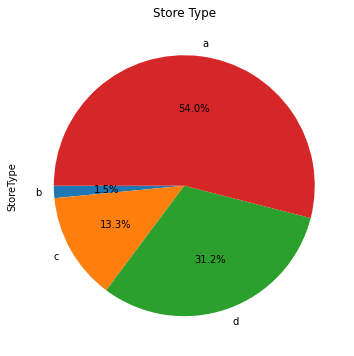

In [ ]:
store_types = store_df['StoreType'].value_counts().sort_values()
ax= store_types.plot.pie(autopct="%.1f%%",startangle=180, figsize=(6,6))
ax.set_title('Store Type')

In [ ]:
# how much customer purchases on average:
merged_df.groupby(by=['StoreType']).mean()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
StoreType,,,,,,,,,,,,,
a,560.079706,3.998278,5738.179710,659.034880,0.828598,0.381606,0.178405,5166.453217,7.176508,2008.598584,0.467501,23.658601,2011.861536
b,562.045610,3.998042,10058.837334,1987.720846,0.983133,0.381933,0.184207,1066.058117,6.666667,2007.777778,0.285913,22.274856,2012.791869
c,608.225402,3.998144,5723.629246,673.265894,0.825621,0.381789,0.180159,3516.699503,7.048265,2008.506842,0.498816,21.420903,2011.541563
d,533.561864,3.998552,5641.819243,501.434892,0.826987,0.381213,0.178130,6959.874812,7.426956,2009.004084,0.570473,23.438300,2011.650066


In [ ]:
# Ratio of sales to customer by store type:
store_a = merged_df.groupby(by=['StoreType']).mean()
store_a.Sales/store_a.Customers

StoreType
a     8.706944
b     5.060488
c     8.501291
d    11.251350
dtype: float64

Text(0.5, 1.0, 'Sales histogram (log scale)')

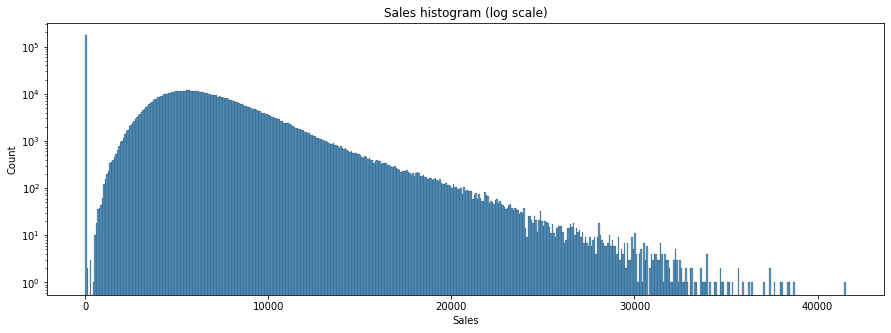

In [ ]:
# histogram of sales:
# merged_df['Sales'].hist()

# later by store type:

# log scale hist:
fig, ax = plt.subplots(figsize=(15,5))
g = sns.histplot(data=merged_df, x='Sales',ax=ax)
ax.set_yscale('log')
ax.set_title('Sales histogram (log scale)')

In [ ]:
# Day of week analysis
day_of_week = merged_df.groupby(by=['DayOfWeek', 'Open']).mean()
day_of_week

Store        Sales  ...  Promo2SinceWeek  Promo2SinceYear
DayOfWeek Open                           ...                                  
1         0     558.582566     0.000000  ...        23.670021      2011.775953
          1     558.419097  8216.073074  ...        23.249469      2011.751580
2         0     563.515561     0.000000  ...        23.216418      2011.909382
          1     558.377762  7088.113656  ...        23.261417      2011.750455
3         0     564.547868     0.000000  ...        23.209738      2011.790262
          1     558.280331  6728.122978  ...        23.262182      2011.751507
4         0     558.489867     0.000000  ...        23.746940      2011.773569
          1     558.418444  6767.310159  ...        23.231223      2011.751071
5         0     560.638584     0.000000  ...        23.016689      2011.770451
          1     558.308836  7072.677012  ...        23.287471      2011.752011
6         0     576.982143     0.000000  ...        20.949438      2012.081461
          1     558.340641  5874.840238  ...        23.282849      2011.751227
7         0     558.033804     0.000000  ...        23.326508      2011.736876
          1     573.880045  8224.723908  ...        19.352239      2012.888557

[14 rows x 11 columns]

In [ ]:
type_open_count = merged_df.groupby(by=['DayOfWeek','StoreType']).count()
type_open_sum = merged_df.groupby(by=['DayOfWeek','StoreType']).sum()
type_open_sum.Open/type_open_count.Open

DayOfWeek  StoreType
1          a            0.950550
           b            0.983570
           c            0.948120
           d            0.949647
2          a            0.988734
           b            0.982363
           c            0.986787
           d            0.988525
3          a            0.974570
           b            0.982363
           c            0.971993
           d            0.974751
4          a            0.923375
           b            0.982812
           c            0.924908
           d            0.919129
5          a            0.949979
           b            0.983253
           c            0.948868
           d            0.950796
6          a            0.995286
           b            0.983570
           c            0.994863
           d            0.996294
7          a            0.014016
           b            0.984014
           c            0.000000
           d            0.006221
Name: Open, dtype: float64

In [ ]:
median_distance = merged_df['CompetitionDistance'].median()
competition_distance_df = merged_df.groupby([merged_df['CompetitionDistance'] > median_distance]).groups
lower_median, higher_median = competition_distance_df[False], competition_distance_df[True]
print('Given competition closer than median, Sales per customer = {}'.format(merged_df.loc[lower_median]['Sales'].mean()/merged_df.loc[lower_median]['Customers'].mean()))
print('Given competition farther away than median, Sales per customer = {}'.format(merged_df.loc[higher_median]['Sales'].mean()/merged_df.loc[higher_median]['Customers'].mean()))

Given competition closer than median, Sales per customer = 8.311814729196316
Given competition farther away than median, Sales per customer = 10.17297669707277



### More EDA

In [ ]:
# if 'merged_df' not in dir() or merged_df == []:
#     merged_df = savedm
# display(merged_df)

In [ ]:
corrs = merged_df.corr()
corrs

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641,-0.026413,-0.050746,-0.004592,0.008488,0.009865,0.038928
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,-0.000025,0.000006,-0.000025,0.000168,0.000174,0.000049
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,-0.019229,-0.028257,0.012659,-0.091040,0.059558,-0.021127
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,-0.102861,-0.030954,0.008931,-0.150159,0.040531,0.028974
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171,0.007992,0.001384,0.002771,-0.008309,-0.002430,0.001637
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483,0.000138,-0.000023,0.000152,-0.000983,-0.001008,-0.000283
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000,-0.003689,-0.000526,0.001520,-0.006909,-0.003133,-0.003682
CompetitionDistance,-0.026413,-0.000025,-0.019229,-0.102861,0.007992,0.000138,-0.003689,1.000000,-0.061624,0.025397,-0.139886,-0.054384,-0.109695
CompetitionOpenSinceMonth,-0.050746,0.000006,-0.028257,-0.030954,0.001384,-0.000023,-0.000526,-0.061624,1.000000,-0.060594,-0.009383,-0.036251,0.050326
CompetitionOpenSinceYear,-0.004592,-0.000025,0.012659,0.008931,0.002771,0.000152,0.001520,0.025397,-0.060594,1.000000,-0.077336,-0.079784,0.012155


In [ ]:
from cycler import cycler 
plt.style.use('ggplot')
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]
prop_cycle=(cycler('color', color_pal))

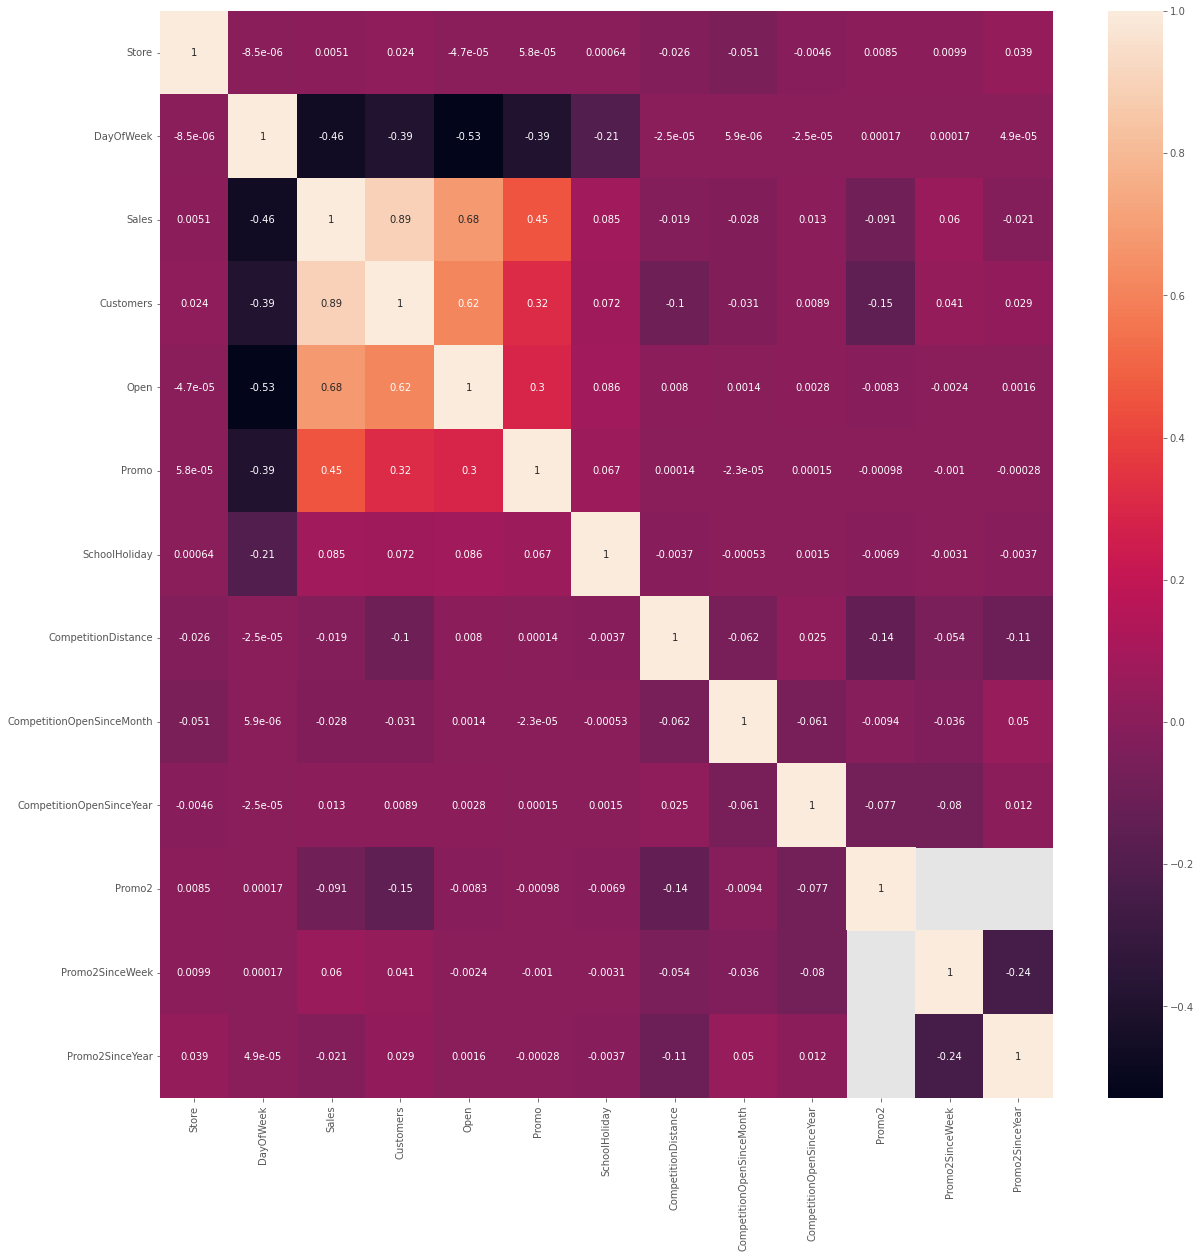

In [ ]:


plt.rcParams['figure.figsize'] = [20, 20] # width, height
sns.heatmap(corrs, annot=True)
plt.show()

In [ ]:
corrSales = merged_df.corrwith(merged_df.Sales)
corrSales_df = pd.DataFrame()
corrSales_df["corr"] = corrSales
corrSales_df["abs"] = corrSales_df["corr"].abs()


corrSales_df = corrSales_df.sort_values(by=['abs'],ascending=False)

corrSales = corrSales_df['corr']
print(f"Showing the correlation of Sales and the other columns, sorted by magnitude")
display(corrSales)
# corrSales[absv]
# corrSales.sort_values

Showing the correlation of Sales and the other columns, sorted by magnitude


Sales                        1.000000
Customers                    0.894711
Open                         0.678472
DayOfWeek                   -0.462125
Promo                        0.452345
Promo2                      -0.091040
SchoolHoliday                0.085124
Promo2SinceWeek              0.059558
CompetitionOpenSinceMonth   -0.028257
Promo2SinceYear             -0.021127
CompetitionDistance         -0.019229
CompetitionOpenSinceYear     0.012659
Store                        0.005126
Name: corr, dtype: float64

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [ ]:
merged_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [ ]:
merged_df['StateHoliday'] = merged_df['StateHoliday'].replace(0,'0')
merged_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

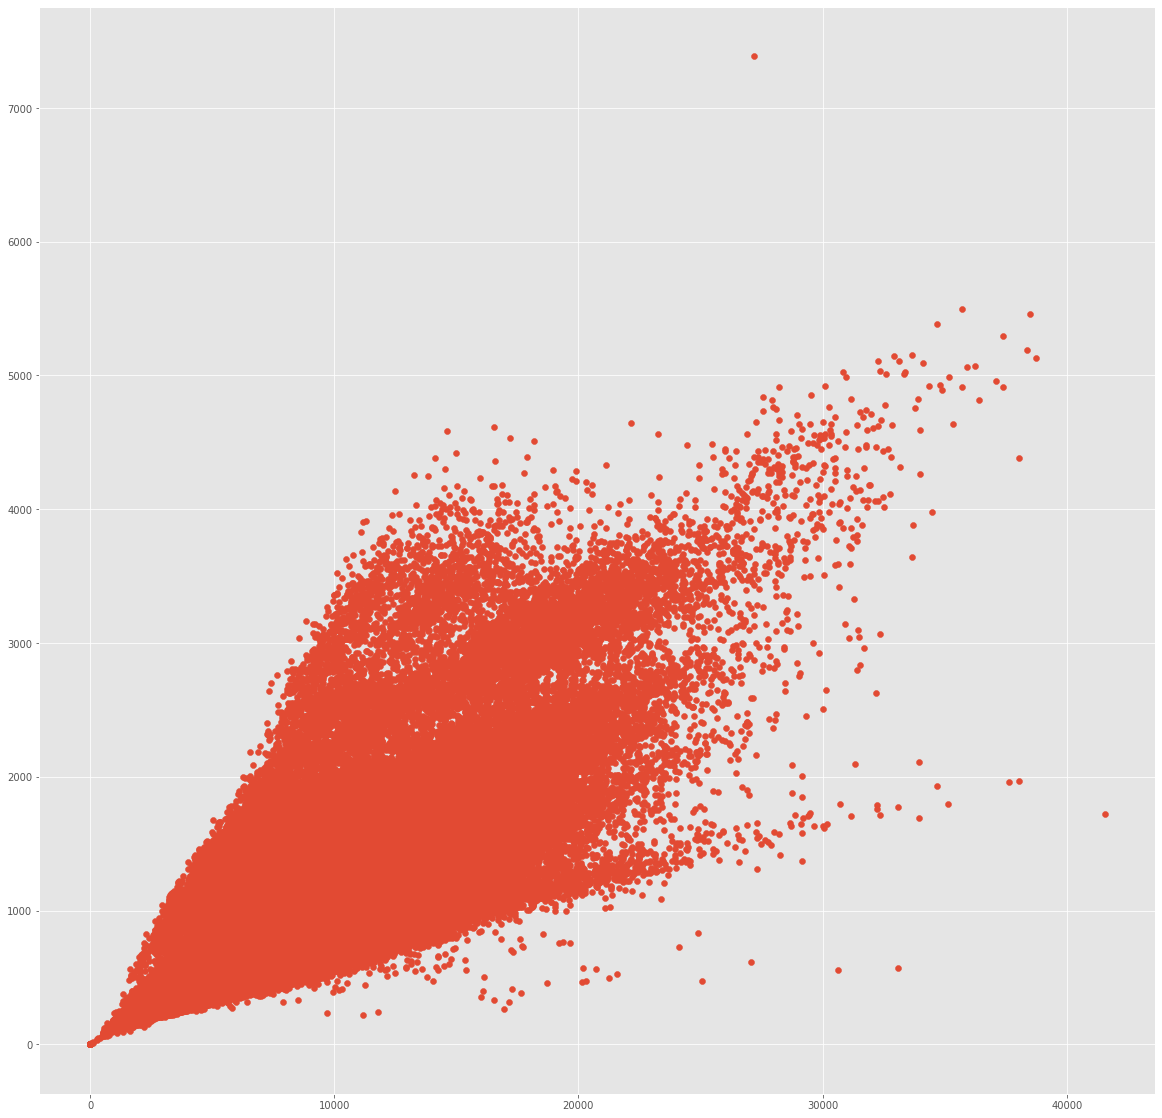

In [ ]:
#customers matter a lot for sales
plt.scatter(merged_df['Sales'], merged_df['Customers'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


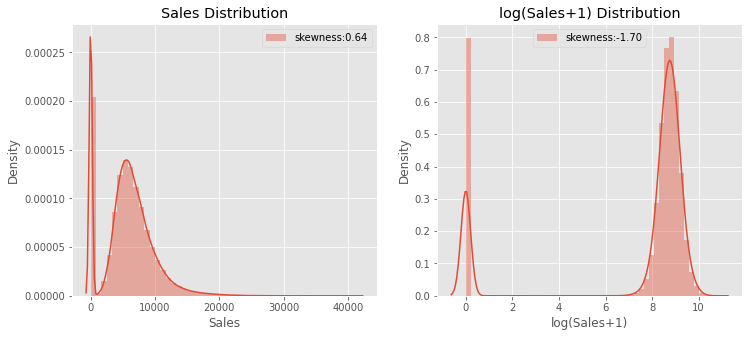

In [ ]:
#lets look more at sales
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
g1 = sns.distplot(merged_df['Sales'],hist = True,label='skewness:{:.2f}'.format(merged_df['Sales'].skew()),ax = ax1)
g1.legend()
g1.set(xlabel = 'Sales', ylabel = 'Density', title = 'Sales Distribution')
g2 = sns.distplot(np.log1p(merged_df['Sales']),hist = True,label='skewness:{:.2f}'.format(np.log1p(merged_df['Sales']).skew()),ax=ax2)
g2.legend()
g2.set(xlabel = 'log(Sales+1)',ylabel = 'Density', title = 'log(Sales+1) Distribution')
plt.show()

In [ ]:
merged_df.Sales.sort_values()

1017208        0
479104         0
479097         0
479090         0
479083         0
           ...  
51506      38037
237476     38367
237489     38484
237517     38722
827591     41551
Name: Sales, Length: 1017209, dtype: int64

In [ ]:
# i noticed there are a bunch of zero sale rows and the scoring apparently doesnt include that 
zero_sales = merged_df[merged_df['Sales']<=0]
print(f"Rows with 0 sales {len(zero_sales)}")
print(f"Percentage of rows with 0 sales to all rows {len(merged_df)/len(zero_sales) : .2f}%")
print(f"Ratio of rows with 0 sales to rows with non0 sales {len(zero_sales)}:{len(merged_df)-len(zero_sales)}")

Rows with 0 sales 172871
Percentage of rows with 0 sales to all rows  5.88%
Ratio of rows with 0 sales to rows with non0 sales 172871:844338


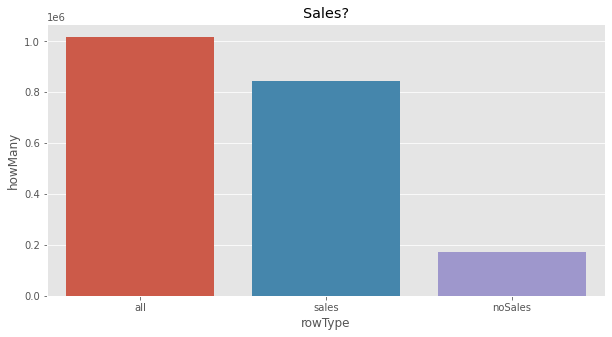

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5] # width, height
zero_df = pd.DataFrame({
    'rowType': ['all','sales','noSales'],
    'howMany': [len(merged_df),len(merged_df)-len(zero_sales),len(zero_sales)]
})
# .sort_values('howMany', ascending=False)
plt.title('Sales?')
sns.barplot(data=zero_df, x='rowType', y='howMany');

{'Mean': 5430.085652302903,
 'Median': 2330.0,
 'Standard Dev': 7715.319897995119}

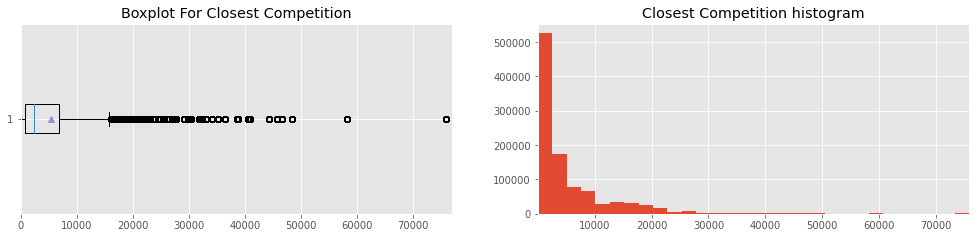

In [ ]:
df_store_check_distribution = merged_df.drop(merged_df[pd.isnull(merged_df.CompetitionDistance)].index)
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_store_check_distribution.CompetitionDistance, showmeans=True,vert=False,)
axes[0].set_xlim(0,max(df_store_check_distribution.CompetitionDistance+1000))
axes[0].set_title('Boxplot For Closest Competition')
axes[1].hist(df_store_check_distribution.CompetitionDistance, cumulative=False, bins=30)
axes[1].set_title("Closest Competition histogram")
axes[1].set_xlim((min(df_store_check_distribution.CompetitionDistance), max(df_store_check_distribution.CompetitionDistance)))
{"Mean":np.nanmean(merged_df.CompetitionDistance),"Median":np.nanmedian(merged_df.CompetitionDistance),"Standard Dev":np.nanstd(merged_df.CompetitionDistance)}

### Feature engineering

In [ ]:
# features.append('DayOfWeek')
# features.append('month')
# features.append('day')
# features.append('year')
# merged_df.Date.astype(str)[0]
datesplit = merged_df.Date.astype(str).apply(lambda x: x.split('-'))
years = [i[0] for i in datesplit]
months = [i[1] for i in datesplit]
days = [i[2] for i in datesplit]
merged_df['year'] = years
merged_df['year'] = merged_df['year'].astype(int)
merged_df['month'] = months
merged_df['month'] = merged_df['month'].astype(int)
merged_df['day'] = days
merged_df['day'] = merged_df['day'].astype(int)
display(merged_df)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,30
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,29
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,28
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,5
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,4
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,3
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,2


## Model

### Prep

In [ ]:
X = merged_df.drop('Sales', axis=1) # drops col functionally
X = X.drop(['Date'],axis=1)

#### Encoding

I was going to do an embedding for the categorical encoding (cat2vec shindig) but just super rough model using an ordinal encoder for ease

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

categoricals = X.select_dtypes(object).columns
print(categoricals)
ord_enc = OrdinalEncoder()
X[categoricals] = ord_enc.fit_transform(X[categoricals])

Index(['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')


In [ ]:
ord_enc

OrdinalEncoder()

#### Split

In [ ]:
y = merged_df[['Sales']]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

### Model

In [ ]:
!pip install xgboost -U

     |████████████████████████████████| 173.5 MB 68 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
import xgboost
xgboost.__version__

'1.5.0'

In [ ]:
from xgboost import DMatrix

In [ ]:
%%capture
!pip install sktime

In [ ]:
from xgboost import XGBRegressor
from sktime.performance_metrics.forecasting import MeanSquaredPercentageError

model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=1500, max_depth=5, tree_method='gpu_hist', predictor='gpu_predictor', eval_metric=MeanSquaredPercentageError(square_root=True))
model.fit(X_train, y_train, eval_set=[(X_train,y_train)])

[0]	validation_0-rmse:4960.91406
[1]	validation_0-rmse:3596.51709
[2]	validation_0-rmse:2667.08765
[3]	validation_0-rmse:2049.75635
[4]	validation_0-rmse:1643.77905
[5]	validation_0-rmse:1390.02087
[6]	validation_0-rmse:1238.35962
[7]	validation_0-rmse:1136.91589
[8]	validation_0-rmse:1075.84680
[9]	validation_0-rmse:1031.79883
[10]	validation_0-rmse:1005.83051
[11]	validation_0-rmse:979.34937
[12]	validation_0-rmse:967.00641
[13]	validation_0-rmse:945.95801
[14]	validation_0-rmse:936.94226
[15]	validation_0-rmse:927.12946
[16]	validation_0-rmse:911.60492
[17]	validation_0-rmse:903.57568
[18]	validation_0-rmse:897.91730
[19]	validation_0-rmse:890.10626
[20]	validation_0-rmse:882.33972
[21]	validation_0-rmse:879.06714
[22]	validation_0-rmse:873.68689
[23]	validation_0-rmse:863.68024
[24]	validation_0-rmse:860.40210
[25]	validation_0-rmse:857.72852
[26]	validation_0-rmse:851.93176
[27]	validation_0-rmse:849.16870
[28]	validation_0-rmse:844.39832
[29]	validation_0-rmse:841.55279
[30]	vali

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eval_metric=MeanSquaredPercentageError(square_root=True), gamma=0,
             gpu_id=0, importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1500, n_jobs=-1, num_parallel_tree=1,
             predictor='gpu_predictor', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [ ]:
model.save_model("poo.xgb")

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:585: UserWarning: kwargs is not saved in Scikit-Learn meta.
  warnings.warn(str(k) + ' is not saved in Scikit-Learn meta.', UserWarning)


In [ ]:
moo = XGBRegressor()
moo.load_model("poo.xgb")

In [ ]:
moo

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1500, n_jobs=-1,
             num_parallel_tree=1, predictor='gpu_predictor', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [ ]:
score = model.score(X_train, y_train)  
print(f"Training score: {score:.5f}")

Training score: 0.99232


In [ ]:
from sklearn.metrics import mean_squared_error

preds = model.predict(X_test)
mse = mean_squared_error(y_test, preds)
print(f"MSE: {mse: .2f}")
print(f"RMSE: {(mse**(1/2.0)): .2f}")

MSE:  138366.48
RMSE:  371.98


In [ ]:
from sktime.performance_metrics.forecasting import MeanSquaredPercentageError

In [ ]:
preds_sorted = preds.copy()
preds_sorted.sort()
print(preds_sorted)

y_test_sorted = y_test.values.copy().flatten()
y_test_sorted.sort()
print(y_test_sorted)

[-1148.9863  -1076.801    -867.18884 ... 34564.504   37811.75
 39756.22   ]
[    0     0     0 ... 36227 38037 38722]


In [ ]:
rmspe = MeanSquaredPercentageError(square_root=True)
test_rmspe = rmspe(y_test, preds)

train_preds = model.predict(X_train)
train_rmspe = rmspe(y_train, train_preds)

print(f"RMSPE training: {train_rmspe : .4f}")
print(f"RMSPE testing: {test_rmspe : .4f}")

RMSPE training:  0.8259
RMSPE testing:  0.8261


Hmm that doesn't look right...


The rules say that any day with <=0 sales will be ignored

In [ ]:
y_test_nonzeroindeces = (y_test.values > 0)
y_test_nonzero = y_test[y_test_nonzeroindeces]
X_test_nonzero = X_test[y_test_nonzeroindeces]
preds_nonzero = model.predict(X_test_nonzero)

In [ ]:
y_train_nz_ind = (y_train.values > 0)
y_train_nz = y_train[y_train_nz_ind]
X_train_nz = X_train[y_train_nz_ind]
preds_train_nz = model.predict(X_train_nz)

In [ ]:
test_rmspe_nz = rmspe(y_test_nonzero, preds_nonzero)

train_rmspe_nz = rmspe(y_train_nz, preds_train_nz)

print(f"Nonzero Train RMSPE: {train_rmspe_nz : .4f}")
print(f"Nonzero Test RMSPE: {test_rmspe_nz : .4f}")

Nonzero Train RMSPE:  0.0536
Nonzero Test RMSPE:  0.0566


In [ ]:
n_classes = y_train_nz.shape[1]
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_true=y_train_nz, y_score=preds_train_nz)
print(fpr)
print(tpr)
print(thresholds)
    # metrics.log_roc_curve(fpr, tpr, thresholds)

ValueError: ignored

In [ ]:
# from sklearn.metrics import confusion_matrix
# confusion_matrix( y_test_nonzero>.1, preds_nonzero>.1 ).tolist()

[[211089]]

Ummmm so the top on the kaggle leaderboard is .1 or .089 and this seems to be better...

Not really sure what to make of that 

### understand the model?

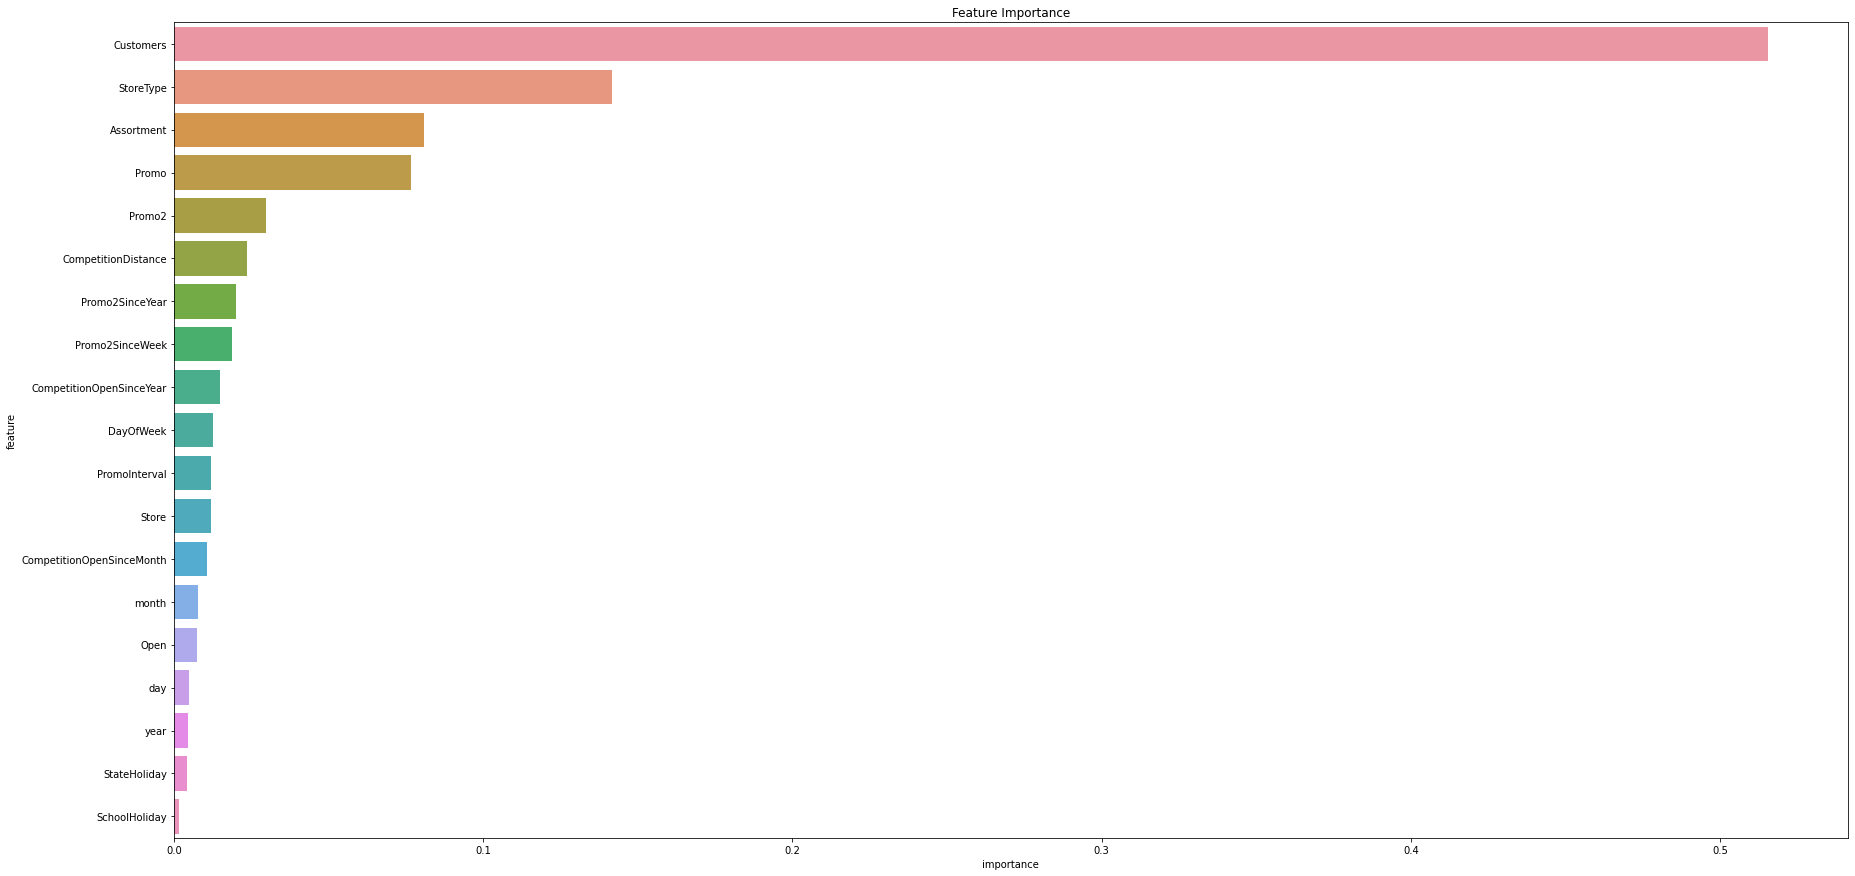

In [ ]:
from xgboost import plot_importance
%matplotlib inline

plt.rcParams['figure.figsize'] = [30, 15]

importances = pd.DataFrame({
    'feature': X_test.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(data=importances.head(40), x='importance', y='feature');
plt.show()

## Model ensuring sequential date

In [ ]:
seq_df = merged_df.copy().sort_values(by=['Date','Store'])
display(seq_df)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
941,1,2,2013-01-01,0,0,0,0,a,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013,1,1
1883,2,2,2013-01-01,0,0,0,0,a,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2013,1,1
2825,3,2,2013-01-01,0,0,0,0,a,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2013,1,1
3767,4,2,2013-01-01,0,0,0,0,a,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2013,1,1
4709,5,2,2013-01-01,0,0,0,0,a,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2013,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012499,1111,5,2015-07-31,5723,422,1,1,0,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,7,31
1013441,1112,5,2015-07-31,9626,767,1,1,0,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2015,7,31
1014383,1113,5,2015-07-31,7289,720,1,1,0,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2015,7,31
1015325,1114,5,2015-07-31,27508,3745,1,1,0,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2015,7,31


In [ ]:
savedm = merged_df.copy()
print(seq_df[seq_df.index==33].values)
print(merged_df[merged_df.index==33].values)
seq33 = seq_df[seq_df.index==33].values[0]
merg33 = merged_df[merged_df.index==33].values[0]
same = True
for i,j in zip(seq33, merg33):
    ii = str(i)
    jj = str(j)
    if ii != jj: 
        print(f"BAD: {ii}, {jj}")
        same = False
if same:
    print("merged and seq are probably the same, deleting merged")    
    del merged_df
else: print("not the same!! agh")

[[1 7 Timestamp('2015-06-28 00:00:00') 0 0 0 0 '0' 0 'c' 'a' 1270.0 9.0
  2008.0 0 nan nan nan 2015 6 28]]
[[1 7 Timestamp('2015-06-28 00:00:00') 0 0 0 0 '0' 0 'c' 'a' 1270.0 9.0
  2008.0 0 nan nan nan 2015 6 28]]
merged and seq are probably the same, deleting merged


In [ ]:
X2 = seq_df.drop('Sales', axis=1) # drops col "functionally"
X2 = X2.drop(['Date'], axis=1)
X2

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
941,1,2,0,0,0,a,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013,1,1
1883,2,2,0,0,0,a,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2013,1,1
2825,3,2,0,0,0,a,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2013,1,1
3767,4,2,0,0,0,a,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2013,1,1
4709,5,2,0,0,0,a,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2013,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012499,1111,5,422,1,1,0,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,7,31
1013441,1112,5,767,1,1,0,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2015,7,31
1014383,1113,5,720,1,1,0,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2015,7,31
1015325,1114,5,3745,1,1,0,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2015,7,31


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
categoricals2 = X2.select_dtypes(object).columns
print(categoricals2)
ord_enc2 = OrdinalEncoder()
X2[categoricals2] = ord_enc2.fit_transform(X2[categoricals2])

Index(['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')


In [ ]:
y2 = seq_df[['Sales']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, random_state=42, shuffle=False)

In [ ]:
from xgboost import XGBRegressor
from sktime.performance_metrics.forecasting import MeanSquaredPercentageError

model2 = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=1500, max_depth=5, tree_method='gpu_hist', predictor='gpu_predictor', eval_metric=MeanSquaredPercentageError(square_root=True))
model2.fit(X2_train, y2_train, eval_set=[(X2_train,y2_train)])

[0]	validation_0-rmse:4908.91602
[1]	validation_0-rmse:3554.12598
[2]	validation_0-rmse:2636.74341
[3]	validation_0-rmse:2024.46094
[4]	validation_0-rmse:1629.03125
[5]	validation_0-rmse:1374.11267
[6]	validation_0-rmse:1217.65015
[7]	validation_0-rmse:1128.79211
[8]	validation_0-rmse:1075.22693
[9]	validation_0-rmse:1021.05298
[10]	validation_0-rmse:992.93060
[11]	validation_0-rmse:964.60748
[12]	validation_0-rmse:950.03021
[13]	validation_0-rmse:940.29413
[14]	validation_0-rmse:926.91260
[15]	validation_0-rmse:914.65314
[16]	validation_0-rmse:898.67798
[17]	validation_0-rmse:892.94226
[18]	validation_0-rmse:882.21082
[19]	validation_0-rmse:878.49335
[20]	validation_0-rmse:875.09241
[21]	validation_0-rmse:868.49347
[22]	validation_0-rmse:866.16785
[23]	validation_0-rmse:854.85065
[24]	validation_0-rmse:848.11108
[25]	validation_0-rmse:837.86047
[26]	validation_0-rmse:834.77631
[27]	validation_0-rmse:832.28711
[28]	validation_0-rmse:824.84442
[29]	validation_0-rmse:816.29987
[30]	valid

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eval_metric=MeanSquaredPercentageError(square_root=True), gamma=0,
             gpu_id=0, importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1500, n_jobs=-1, num_parallel_tree=1,
             predictor='gpu_predictor', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [ ]:
y2_test_nz_ind = (y2_test.values > 0)
y2_test_nz = y2_test[y2_test_nz_ind]
X2_test_nz = X2_test[y2_test_nz_ind]
preds2_nz = model2.predict(X2_test_nz)

y2_train_nz_ind = (y2_train.values > 0)
y2_train_nz = y2_train[y2_train_nz_ind]
X2_train_nz = X2_train[y2_train_nz_ind]
preds2_train_nz = model2.predict(X2_train_nz)

In [ ]:
test2_rmspe_nz = rmspe(y2_test_nz, preds2_nz)

train2_rmspe_nz = rmspe(y2_train_nz, preds2_train_nz)

print(f"Train RMSPE ensuring seq: {train2_rmspe_nz : .4f}")
print(f"Test RMSPE ensuring seq: {test2_rmspe_nz : .4f}")

Train RMSPE ensuring seq:  0.0535
Test RMSPE ensuring seq:  0.0689


In [ ]:
m1_preds2_nz = model.predict(X2_test_nz)
m1_preds2_train_nz = model.predict(X2_train_nz)

m1_test2_rmspe_nz = rmspe(y2_test_nz, m1_preds2_nz)
m1_train2_rmspe_nz = rmspe(y2_train_nz, m1_preds2_train_nz)

print(f"Nonzero Train RMSPE: {m1_train2_rmspe_nz : .4f}")
print(f"Nonzero Test RMSPE: {m1_test2_rmspe_nz : .4f}")

Nonzero Train RMSPE:  0.0547
Nonzero Test RMSPE:  0.0533
